3-) 

* Edinburgh mutfak eşyaları veri seti1 için hazırlanan ekteki 10 farklı nesneye ait görüntüler 
ile bir nesne sınıflandırma sistemi gerçekleştiriniz. 

* Bunun için nesnelerin RAW olarak isimlendirilmiş klasörlerindeki her bir görüntüyü okuyup 0.25 oranla yeniden 
boyutlandırınız. Bu görüntülerin her birine öncelikle ikinci maddede geliştirdiğiniz ilgi noktası bulucu algoritmayı uygulayıp ilgi noktalarının konumlarını ve ölçeklerini tespit ediniz. 

* Ardından ilgi noktalarını merkeze alan ve noktanın ölçeğine bağlı olarak boyutunu ayarlayacağınız W×W büyüklüğündeki bir pencere içerisinde 4×4 hücre ve her bir hücre için 8 uzunluklu histogramlar belirleyerek yönelimli eğimlerin histogramı (HoG) tanımlayıcısını çalıştırınız. 

* Böylece bir ilgi noktası için 128 uzunluklu bir özellik vektörü oluşturunuz. 

* HoG tanımlayıcısı OpenCV içerisinden hazır olarak kullanılabilir veya HoG’un interpolasyon aşamaları göz ardı edilerek kodlanabilir. 

* Bu şekilde tüm görüntüler için oluşturduğunuz ilgi noktalarını ve tanımlayıcılarını her nesne için IP isimli bir klasör altına görüntülerin dosya ismi ile kaydediniz. 

* İlgi noktalarını belirledikten sonra her nesnenin ilk 8 görüntüsüne ait ilgi noktalarını eğitim son 2 görüntüsüne ait olanları ise test amaçlı kullanarak k en yakın komşu nesne sınıflandırma işlemini gerçekleştiriniz. 

[INFO] veri yukleniyor...


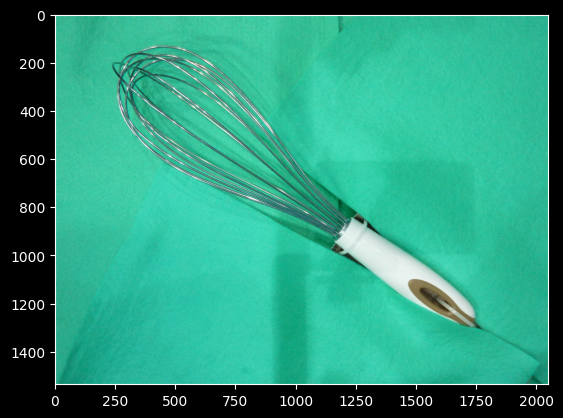

((80, 640, 640, 3), (80,), (20, 640, 640, 3), (20,))

In [3]:
from utensils_data_read import load_data

import cv2
import matplotlib.pyplot as plt
import numpy as np

from utils import img_read, show_img, show_hist

# Veriyi yükle ve eğitim ve test olarak ayır.
trainX, testX, trainY, testY = load_data()

trainX.shape, trainY.shape, testX.shape, testY.shape 

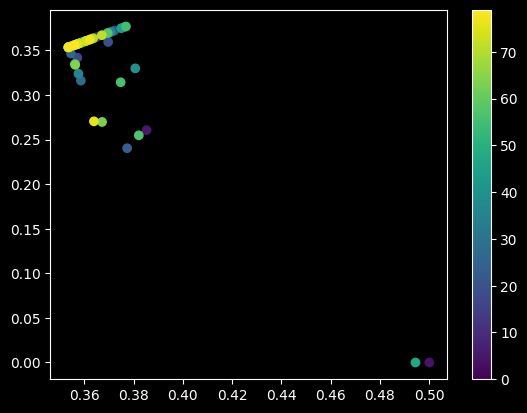

c:\Users\XTI\Desktop\Education\Yüksek Lisans\MSc_Projects\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['WHISK' 'MASHER' 'PEELER' 'PEELER' 'FISH_SLICE' 'KITCHEN_KNIFE'
 'BOTTLE_OPENER' 'PEELER' 'BOTTLE_OPENER' 'LADLE' 'FISH_SLICE'
 'SOUP_SPOON' 'DINNER_FORK' 'TONGS' 'KITCHEN_KNIFE' 'KITCHEN_KNIFE'
 'FISH_SLICE' 'PEELER' 'BOTTLE_OPENER' 'FISH_SLICE' 'WHISK' 'FISH_SLICE'
 'DINNER_FORK' 'DINNER_FORK' 'KITCHEN_KNIFE' 'WHISK' 'PEELER' 'SOUP_SPOON'
 'PEELER' 'LADLE' 'PEELER' 'WHISK' 'WHISK' 'SOUP_SPOON' 'BOTTLE_OPENER'
 'DINNER_FORK' 'MASHER' 'MASHER' 'TONGS' 'TONGS' 'KITCHEN_KNIFE'
 'FISH_SLICE' 'LADLE' 'MASHER' 'TONGS' 'LADLE' 'WHISK' 'FISH_SLICE'
 'MASHER' 'SOUP_SPOON' 'LADLE' 'DINNER_FORK' 'TONGS' 'TONGS'
 'BOTTLE_OPENER' 'KITCHEN_KNIFE' 'WHISK' 'LADLE' 'MASHER' 'BOTTLE_OPENER'
 'SOUP_SPOON' 'LADLE' 'SOUP_SPOON' 'LADLE' 'TONGS' 'DINNER_FORK'
 'SOUP_SPOON' 'BOTTLE_OPENER' 'BOTTLE_OPENER' 'DINNER_FORK' 'TONGS'
 'MASHER' 'DINNER_FORK' 'KITCHEN_KNIFE' 'MASHER' 'SOUP_SPOON'
 'KITCHEN_KNIFE' 'FISH_SLICE' 'PEELER' 'WHISK']

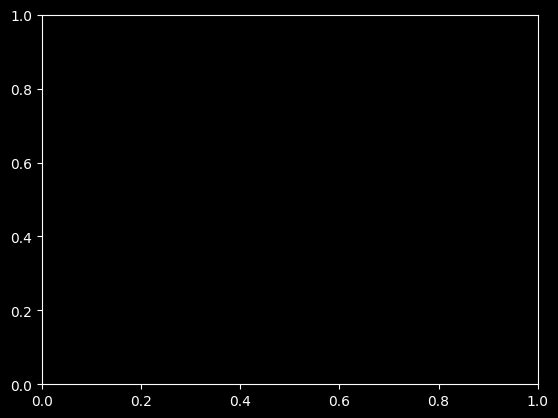

In [7]:
from skimage.feature import hog

from .utils import find_poi


descriptors = []
for img in trainX:
    # apply ROI detection
    points_of_interest = find_poi(img, visualize=True)

    
    fd, hog_image = hog(image=img, orientations=8, pixels_per_cell=(4, 4),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)
    descriptors.append(fd)
    
# plot descriptors
descriptors = np.array(descriptors)

# visulize descriptors in scatter plot and color code by class
plt.scatter(descriptors[:,0], descriptors[:,1], c=range(len(trainY)))
# add a color bar
plt.colorbar()
plt.show()

# apply k-means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=len(set(trainY)), random_state=0).fit(descriptors)

# plot the cluster centers

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c=trainY)

#calculate metrics
print("confusion_matrix: \n",confusion_matrix(y_test, y_pred))
print("classificaton_report: \n", classification_report(y_test, y_pred))
plt.show()

## Alternative


In [ ]:
import cv2
import os
import numpy as np
from PIL import Image
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from skimage.feature import hog
def preprocess(image):
    img = cv2.resize(img,  (640, 640)) 
    img = np.asarray(img, dtype=np.float32)

    feature = feature = hog(image=image, orientations=8, pixels_per_cell=(16, 16), 
                    cells_per_block=(1, 1), visualize=False, channel_axis=None, feature_vector=True)
    return feature

def load_data(path, test_size):
    """
    Loads data from the given path.
    """
    data = []
    labels = []
    for class_idx, class_name in enumerate(os.listdir(path)):
        class_path = os.path.join(path, class_name, 'RAW')
        for file_name in os.listdir(class_path):
            file_path = os.path.join(class_path, file_name)
            image = np.array(Image.open(file_path).convert('L'))
            print("processing: ", file_name, class_idx, image.shape, )
            if image.shape == (1536, 2048):
                # preprocess image and get features
                feature = preprocess(image)
                data.append(feature)
                labels.append(class_idx)

    data, labels = shuffle(data, labels)
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=test_size)
    
    return X_train, X_test, y_train, y_test    

#example usage
X_train, X_test, y_train, y_test = load_data(path = "./dataset", test_size=0.2)
plt.plot([sample.shape[0] for sample in X_train])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

#create knn classifier
knn = KNeighborsClassifier(n_neighbors=len(np.unique(np.array(y_train))))

#train the classifier
knn.fit(X_train, y_train)

#test the classifier
y_pred = knn.predict(X_test)

#calculate metrics
print("confusion_matrix: \n",confusion_matrix(y_test, y_pred))
print("classificaton_report: \n", classification_report(y_test, y_pred))